<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/University_of_Los_Andes_logo.svg/1200px-University_of_Los_Andes_logo.svg.png" width="70" align="left"> 
  <h1> DEPARTAMENTO DE INGENIERIA INDUSTRIAL <br>
  Estrucuturación de Redes Sociales 202120 <br> </h1>
 
 **PROFESORES:** Felipe Montes - Andrés Felipe Usceche - Gianfranco Vietto - Ana María Guerra - Martha Blanco - Ana María Jaramillo

<center> <bold> Integrantes </bold> </center>

|Apellidos|Nombres|Código|Login|
|:---:|:---:|:---:|:---:|
|*Avila Gonzalez*|*Jorge Hernando*|*201812690*|*jh.avila*|
|*Apellidos 2*|*Nombres 2*|*Código 2*|*login 2*|

<h1><center> Taller 3 </center></h1>
<h2><center>Evaluar propiedades de la red a partir de sus medidas estructurales</center></h2>

En esta actividad ustedes trabajarán con los principios detrás de la teoría de detección de comunidades. Sigan las instrucciones para desarrollar la actividad, escriban su código de forma ordenada y bien comentada, coloquen sus argumentaciones en los *Markdown’s* desigandos para ello.

1. Carguen la red de Game of Thones adjunta, pero como una red no dirigida

In [1]:
# Librerías
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import community
import operator

In [44]:
#Cargar información
nodos=pd.read_csv("./Nodes_GOT.csv",index_col="Id")
arcos=pd.read_csv("./Edges_GOT.csv")


SyntaxError: invalid syntax (<ipython-input-44-0e489ce90fab>, line 4)

In [3]:
# Construir red
#Se crea la red como una no dirigida
red = nx.DiGraph()
#Se agregan los nodos junto con todas su propiedades
for nodo in nodos.index:
    red.add_node(nodo)
    for var in nodos.columns:
        red.nodes[nodo][var]=nodos[var][nodo]
#Se agregan los arcos de la red con cada una de sus propiedades
for arco in arcos.index:
    red.add_edge(arcos.Source[arco],arcos.Target[arco],relation=arcos.relation[arco], color=arcos.color[arco],Itly=arcos.lty[arco])

2. Visualicen la red mostrando en cada nodo las iniciales de cada persona

In [47]:
#Se define el diccionario con las etiquetas de cada uno de los nodos 
labeldic = {}

for i in nodos.index:
    labeldic[i] = i[:2]
labeldic

{'Alys Arryn': 'Al',
 'Elys Waynwood': 'El',
 'Jasper Arryn': 'Ja',
 'Jeyne Royce': 'Je',
 'Jon Arryn': 'Jo',
 'Lysa Arryn': 'Ly',
 'Robert Arryn': 'Ro',
 'Rowena Arryn': 'Ro',
 'Cassana Baratheon': 'Ca',
 'Cersei Lannister': 'Ce',
 'Jaime Lannister': 'Ja',
 'Joffrey Baratheon': 'Jo',
 'Margaery Tyrell': 'Ma',
 'Myrcella Baratheon': 'My',
 'Ormund Baratheon': 'Or',
 'Renly Baratheon': 'Re',
 'Rhaelle Targaryen': 'Rh',
 'Robert Baratheon': 'Ro',
 'Selyse Florent': 'Se',
 'Shireen Baratheon': 'Sh',
 'Stannis Baratheon': 'St',
 'Steffon Baratheon': 'St',
 'Tommen Baratheon': 'To',
 'Amarei Crakehall': 'Am',
 'Amerei Frey': 'Am',
 'Benfrey Frey': 'Be',
 'Bethany Rosby': 'Be',
 'Cleos Frey': 'Cl',
 'Dorna Swyft': 'Do',
 'Edmure Tully': 'Ed',
 'Emmon Frey': 'Em',
 'Genna Lannister': 'Ge',
 'Jeyne Darry': 'Je',
 'Jyanna Frey': 'Jy',
 'Kevan Lannister': 'Ke',
 'Lancel Lannister': 'La',
 'Lyonel Frey': 'Ly',
 'Marissa Frey': 'Ma',
 'Mariya Darry': 'Ma',
 'Melesa Crakehall': 'Me',
 'Merrett Frey

<function matplotlib.pyplot.show(close=None, block=None)>

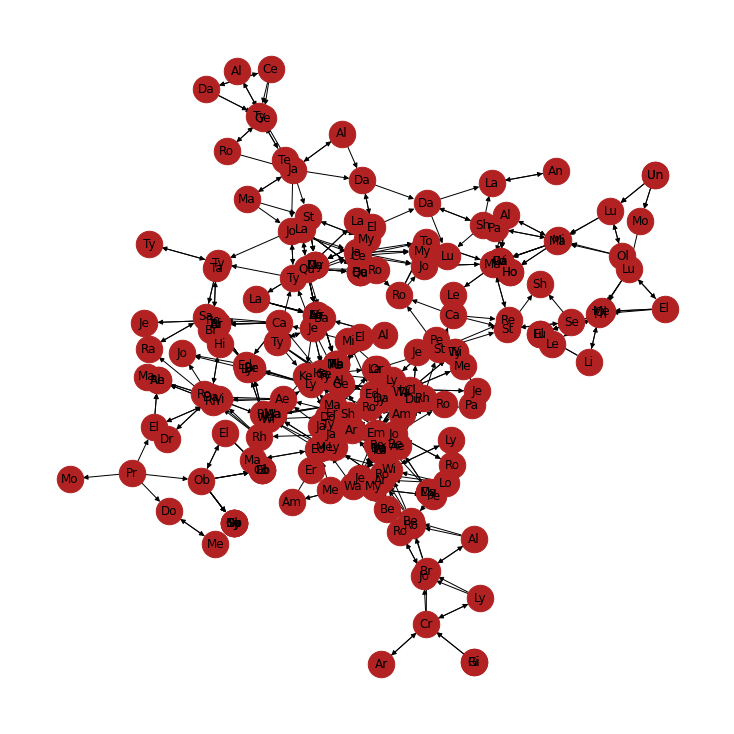

In [56]:
# Gráfica red en cada arco poner el peso 
fig=plt.figure(figsize=(10,10))
pos=nx.spring_layout(red)

# Después se genera el gráfico
nx.draw_kamada_kawai(red, node_size=700, node_color='firebrick', edge_color='black', with_labels=True, labels=labeldic)

# Por último se muestra la gráfica
plt.show

3. Calculen el diametro de la red. *Nota: Tengan presente que tienen que verificar que la red esté completamente conectada y en caso que no lo esté utilizar el componente conectado más grande.*

In [15]:
#Se verifica si el grafo está fuertemente conectado
nx.is_strongly_connected(red)


False

In [64]:
H = red.to_undirected()


In [65]:
#Por que no me sirve
nx.is_connected(H)

False

In [73]:
#Exctraer el componente mas largo
largest_cc = max(nx.connected_components(H), key=len)
# Se calcula el diametro de la red. 


4. Calculen la densidad de la red ¿Creen que es una red altamente conectada?

In [8]:
nx.density(red)
#Se debe hacer la comparación con redes aleatorias?


0.00938312894834634

5. Apliquen la detección por comunidades por el método de optimización y visualicen las comunidades diferenciandolas por color. ¿Cuántas comunidades se detectaron?

In [61]:
partition = community.best_partition(H)
values = [partition.get(node) for node in H.nodes()]
#values

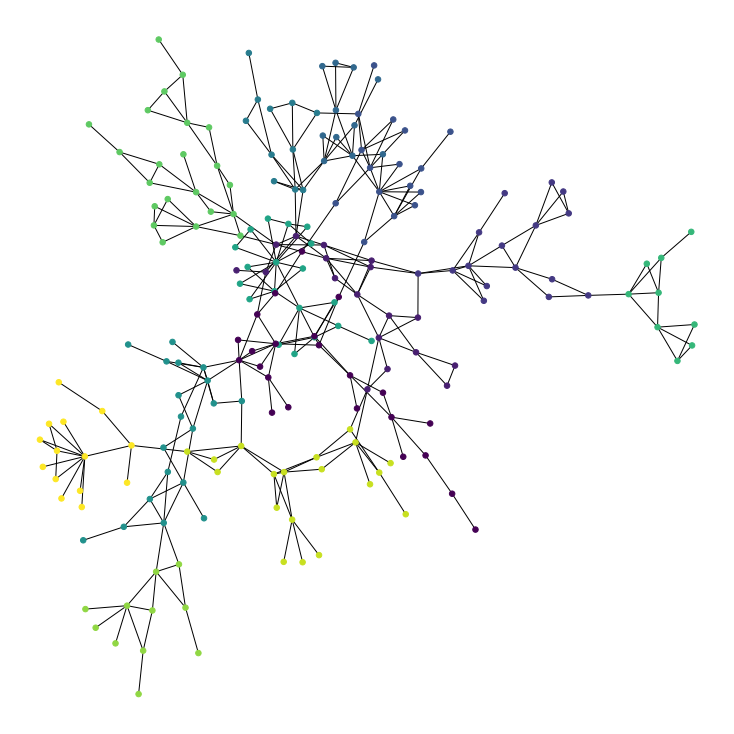

In [62]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(H,node_color = values, node_size=30)

6. Identifiquen los 20 nodos con mayor betweenness ¿Qué creen que representan estas personas en la red?

In [91]:
intermediacion =nx.betweenness_centrality(red)
sorted_intermediacion =sorted(intermediacion.items(), key=operator.itemgetter(1), reverse=True)
sorted_intermediacion

[('Eddard Stark', 0.00519440926785798),
 ('Beron Stark', 0.004760564701468036),
 ('Jason Lannister', 0.003939777683973547),
 ('Rickard Stark', 0.0039046010975094976),
 ('Brandon Stark son of Cregan', 0.003869424511045448),
 ('Edwyle Stark', 0.0036231884057971015),
 ('Willam Stark', 0.0033886778293701044),
 ('Lyarra Stark', 0.003060363022372309),
 ('Cregan Stark', 0.002673420571267764),
 ('Arya Flint', 0.002450635523662117),
 ('Joanna Lannister', 0.0024389099948407674),
 ('Sansa Stark', 0.002368556821912668),
 ('Rodrik Stark son of Beron', 0.00221612494723512),
 ('Gerold Lannister', 0.002180948360771071),
 ('Tyrion Lannister', 0.0016650250926316776),
 ('Steffon Baratheon', 0.0015477698044181793),
 ('Walder Frey', 0.0015477698044181793),
 ('Aegon V Targaryen', 0.001407063458561981),
 ('Rhaelle Targaryen', 0.0012194549974203837),
 ('Merrett Frey', 0.0011256507668495849),
 ('Damon Lannister son of Jason', 0.0011256507668495849),
 ('Robb Stark', 0.0011256507668495849),
 ('Cersei Lannister',

In [90]:
intermediacion =nx.betweenness_centrality(red)
sorted_intermediacion =sorted(intermediacion.values(), reverse=True)
sorted_intermediacion

[0.00519440926785798,
 0.004760564701468036,
 0.003939777683973547,
 0.0039046010975094976,
 0.003869424511045448,
 0.0036231884057971015,
 0.0033886778293701044,
 0.003060363022372309,
 0.002673420571267764,
 0.002450635523662117,
 0.0024389099948407674,
 0.002368556821912668,
 0.00221612494723512,
 0.002180948360771071,
 0.0016650250926316776,
 0.0015477698044181793,
 0.0015477698044181793,
 0.001407063458561981,
 0.0012194549974203837,
 0.0011256507668495849,
 0.0011256507668495849,
 0.0011256507668495849,
 0.0009849444209933868,
 0.0009614933633506871,
 0.0009380423057079874,
 0.0009145912480652877,
 0.0008559636039585383,
 0.0008442380751371887,
 0.0008442380751371887,
 0.0008442380751371887,
 0.0007973359598517893,
 0.0007504338445663899,
 0.0007504338445663899,
 0.0007035317292809905,
 0.0007035317292809905,
 0.0007035317292809905,
 0.0007035317292809905,
 0.0006566296139955912,
 0.0006097274987101919,
 0.0005628253834247924,
 0.0005628253834247924,
 0.0005628253834247924,
 0.00

In [86]:
# Por que no se me ordena de buena forma. 
intermediacion = nx.betweenness_centrality(red)
sorted_intermediacion = sorted(intermediacion,key=lambda item:item[1],reverse=True)
sorted_intermediacion

['Lysa Arryn',
 'Myrcella Baratheon',
 'Jyanna Frey',
 'Lyonel Frey',
 'Tywin Frey',
 'Myranda Lefford',
 'Myrielle Lannister',
 'Tybolt Lannister',
 'Tygett Lannister',
 'Tyrek Lannister',
 'Tyrion Lannister',
 'Tysha',
 'Tytos Lannister',
 'Tywin Lannister',
 'Nymeria Sand',
 'Tyene Sand',
 'Lyanna Glover',
 'Lyanna Stark',
 'Lyarra Stark',
 'Lynara Stark',
 'Lysara Karstark',
 'Myriame Manderly',
 'Dyanna Dayne',
 'Euron Greyjoy',
 'Quellon Greyjoy',
 'Quenton Greyjoy',
 'Lucion Lannister',
 'Duncan Targaryen',
 'Luthor Tyrell',
 'Luthor Tyrell son of Moryn',
 'Luthor Tyrell son of Theodore',
 'Stannis Baratheon',
 'Steffon Baratheon',
 'Stafford Lannister',
 'Asha (Yara) Greyjoy',
 'Ormund Baratheon',
 'Erik Ironmaker',
 'Urrigon Greyjoy',
 'Ermesande Hayford',
 'Princess of Dorne',
 'Arra Norrey',
 'Artos Stark',
 'Arya Flint',
 'Arya Stark',
 'Bran Stark',
 'Brandon Stark',
 'Brandon Stark Burner',
 'Brandon Stark son of Cregan',
 'Cregan Stark',
 'Drogo',
 'Jon Arryn',
 'Robert 

In [17]:
intermediacion

{'Alys Arryn': 2.3451057642699685e-05,
 'Elys Waynwood': 0.0,
 'Jasper Arryn': 0.0,
 'Jeyne Royce': 0.0,
 'Jon Arryn': 0.0004924722104966934,
 'Lysa Arryn': 0.00042211903756859433,
 'Robert Arryn': 0.0,
 'Rowena Arryn': 0.0,
 'Cassana Baratheon': 0.0,
 'Cersei Lannister': 0.0009849444209933868,
 'Jaime Lannister': 0.0007035317292809905,
 'Joffrey Baratheon': 0.00035176586464049525,
 'Margaery Tyrell': 0.0009145912480652877,
 'Myrcella Baratheon': 0.0,
 'Ormund Baratheon': 0.0,
 'Renly Baratheon': 0.00018760846114159748,
 'Rhaelle Targaryen': 0.0012194549974203837,
 'Robert Baratheon': 0.0007504338445663899,
 'Selyse Florent': 0.0,
 'Shireen Baratheon': 0.0,
 'Stannis Baratheon': 0.00037521692228319496,
 'Steffon Baratheon': 0.0015477698044181793,
 'Tommen Baratheon': 0.00035176586464049525,
 'Amarei Crakehall': 0.0,
 'Amerei Frey': 0.00042211903756859433,
 'Benfrey Frey': 9.380423057079874e-05,
 'Bethany Rosby': 0.0,
 'Cleos Frey': 0.0005628253834247924,
 'Dorna Swyft': 0.0,
 'Edmure T

In [20]:
mx =max(nx.betweenness_centrality(red).values())
mx

0.00519440926785798

7. De los 20 nodos identificados anteriormente clasifíquenlos en nodos con alto y bajo grado. Comente que papel tienen los nodos en la red con alto betweenness y bajo grado. *Ayuda: Construyan scatter plot para realizar su análisis*

In [22]:
sorted_intermediacion

['Lysa Arryn',
 'Myrcella Baratheon',
 'Jyanna Frey',
 'Lyonel Frey',
 'Tywin Frey',
 'Myranda Lefford',
 'Myrielle Lannister',
 'Tybolt Lannister',
 'Tygett Lannister',
 'Tyrek Lannister',
 'Tyrion Lannister',
 'Tysha',
 'Tytos Lannister',
 'Tywin Lannister',
 'Nymeria Sand',
 'Tyene Sand',
 'Lyanna Glover',
 'Lyanna Stark',
 'Lyarra Stark',
 'Lynara Stark',
 'Lysara Karstark',
 'Myriame Manderly',
 'Dyanna Dayne',
 'Euron Greyjoy',
 'Quellon Greyjoy',
 'Quenton Greyjoy',
 'Lucion Lannister',
 'Duncan Targaryen',
 'Luthor Tyrell',
 'Luthor Tyrell son of Moryn',
 'Luthor Tyrell son of Theodore',
 'Stannis Baratheon',
 'Steffon Baratheon',
 'Stafford Lannister',
 'Asha (Yara) Greyjoy',
 'Ormund Baratheon',
 'Erik Ironmaker',
 'Urrigon Greyjoy',
 'Ermesande Hayford',
 'Princess of Dorne',
 'Arra Norrey',
 'Artos Stark',
 'Arya Flint',
 'Arya Stark',
 'Bran Stark',
 'Brandon Stark',
 'Brandon Stark Burner',
 'Brandon Stark son of Cregan',
 'Cregan Stark',
 'Drogo',
 'Jon Arryn',
 'Robert 

*Escriba aqui su análisis* <br>



8. Calcule el coeficiente de Clustering de los nodos clasificados anteriormente y reporte el coeficiente promedio de las dos clasificaciones (alto grado y bajo grado de los 20 nodos con mayor betweenness) Comente sus resultados y explique porque se da esta diferencia.

In [ ]:
nx.clustering(G=red,nodes= top20)

*Escriba aquí su análisis* <br>



9. Remueva de la red los nodos con mayor betweenness<br>
*Ayuda:*``G.remove_node(id)``

In [ ]:
red.remove_node(id)

10. Grafique la red resultante al remover los nodos e identifique cuantos componentes tiene la red

11. ¿Los componentes identificados se parecen a las comunidades detectadas por el método de Louvain? ¿Por qué si o porque no?

*Escriba aquí su análisis* <br>



12.  Una vez terminados todos los análisis ustedes poseen un alto nivel de entendimiento de la red, así que con este en mente contesten la siguiente pregunta ¿Qué pueden identificar dentro de la estructura de la red? 

*Escriba aquí su análisis* <br>

